In [32]:
import os 
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns 
import plotly.express as px 
import missingno as msno
import json
from datetime import datetime
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)
pd.set_option('display.max_colwidth', 30)

In [3]:
data_path = '/Users/macintosh/desktop/dataset/airbnb_bangkok_data/'

In [24]:
listing_path = data_path+'listings.csv'
listing2_path = data_path+'listings2.csv'
neighbourhoods_path = data_path + 'neighbourhoods.csv'
neighbourhoods_json_path = data_path + 'neighbourhoods.geojson' # not use for now, we will revisit if have any idea from geo.
reviews_path = data_path + 'reviews.csv'
reviews2_path = data_path + 'reviews2.csv'
calendar_28_mar_23_path = data_path+'28_mar_23_calendar.csv'
calendar_28_dec_22_path = data_path+'28_dec_22_calendar.csv'
calendar_21_sep_22_path = data_path+'21_sep_22_calendar.csv'
calendar_20_jun_22_path = data_path+'20_jun_22_calendar.csv'

In [25]:
df_calendar_28_mar_23 = pd.read_csv(calendar_28_mar_23_path)
df_calendar_28_dec_22 = pd.read_csv(calendar_28_dec_22_path)
df_calendar_21_sep_22 = pd.read_csv(calendar_21_sep_22_path)
df_calendar_20_jun_22 = pd.read_csv(calendar_20_jun_22_path)
df_listing = pd.read_csv(listing_path)
df_listing2 = pd.read_csv(listing2_path)
df_neighbourhoods = pd.read_csv(neighbourhoods_path)
df_reviews = pd.read_csv(reviews_path)
df_reviews2 = pd.read_csv(reviews2_path)

In [36]:
print(df_calendar_28_mar_23.date.agg(['min', 'max']))
print(df_calendar_28_dec_22.date.agg(['min', 'max']))
print(df_calendar_21_sep_22.date.agg(['min', 'max']))
print(df_calendar_20_jun_22.date.agg(['min', 'max']))

min    2023-03-28
max    2024-03-27
Name: date, dtype: object
min    2022-12-28
max    2024-01-02
Name: date, dtype: object
min    2022-09-21
max    2023-10-01
Name: date, dtype: object
min    2022-06-20
max    2023-06-20
Name: date, dtype: object


## Clean data

In [37]:
df_calendar_28_mar_23['date'] = df_calendar_28_mar_23.date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df_calendar_28_mar_23['max_date'] = df_calendar_28_mar_23.date.max()
df_calendar_28_dec_22['date'] = df_calendar_28_dec_22.date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df_calendar_28_dec_22['max_date'] = df_calendar_28_dec_22.date.max()
df_calendar_21_sep_22['date'] = df_calendar_21_sep_22.date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df_calendar_21_sep_22['max_date'] = df_calendar_21_sep_22.date.max()
df_calendar_20_jun_22['date'] = df_calendar_20_jun_22.date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df_calendar_20_jun_22['max_date'] = df_calendar_20_jun_22.date.max()

In [55]:
# df_append = pd.concat([df_calendar_28_mar_23, df_calendar_28_dec_22, df_calendar_21_sep_22, df_calendar_20_jun_22], axis=0)
# df_append.to_csv('/Users/macintosh/desktop/dataset/airbnb_bangkok_data/df_append.csv')

In [106]:
def clean_price(data):
    try:
        return float(data.replace('$','').replace(',',''))
    except:
        return float(data)

In [107]:
df_final = pd.read_csv('/Users/macintosh/desktop/dataset/airbnb_bangkok_data/df_append.csv')

df_final = df_final[~df_final.sort_values(by='max_date', ascending=False).duplicated(subset=['listing_id', 'date'])]

df_final['available'] = df_final.available.apply(lambda x: False if x == 'f' else True)
df_final['price'] = df_final.price.apply(lambda x: clean_price(x))
df_final['adjusted_price'] = df_final.adjusted_price.apply(lambda x: clean_price(x))

/var/folders/wz/ck3sz9r95tv0pwv6x5zcfnw00000gn/T/ipykernel_74957/2524596367.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [95]:
# df_final = df_final.reset_index().drop(columns=['index', 'Unnamed: 0'])
# df_final = df_final.drop(columns=['level_0'])
df_final.head()
# 12698678

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,max_date
0,27934,2023-03-29,True,1885.0,1885.0,3.0,90.0,2024-03-27
1,27934,2023-03-30,True,1885.0,1885.0,3.0,90.0,2024-03-27
2,27934,2023-03-31,True,1885.0,1885.0,3.0,90.0,2024-03-27
3,27934,2023-04-01,True,1885.0,1885.0,3.0,90.0,2024-03-27
4,27934,2023-04-02,True,1885.0,1885.0,3.0,90.0,2024-03-27


In [217]:
null = pd.DataFrame({'Null Values': df_listing2.isna().sum(), 'Percentage Null Values': (df_listing2.isna().sum()/df_listing2.shape[0])*100})
null

,Null Values,Percentage Null Values
id,0,0.000000
listing_url,0,0.000000
scrape_id,0,0.000000
last_scraped,0,0.000000
source,0,0.000000
name,8,0.045988
description,570,3.276615
neighborhood_overview,8565,49.235456
picture_url,0,0.000000
host_id,0,0.000000


<AxesSubplot: >

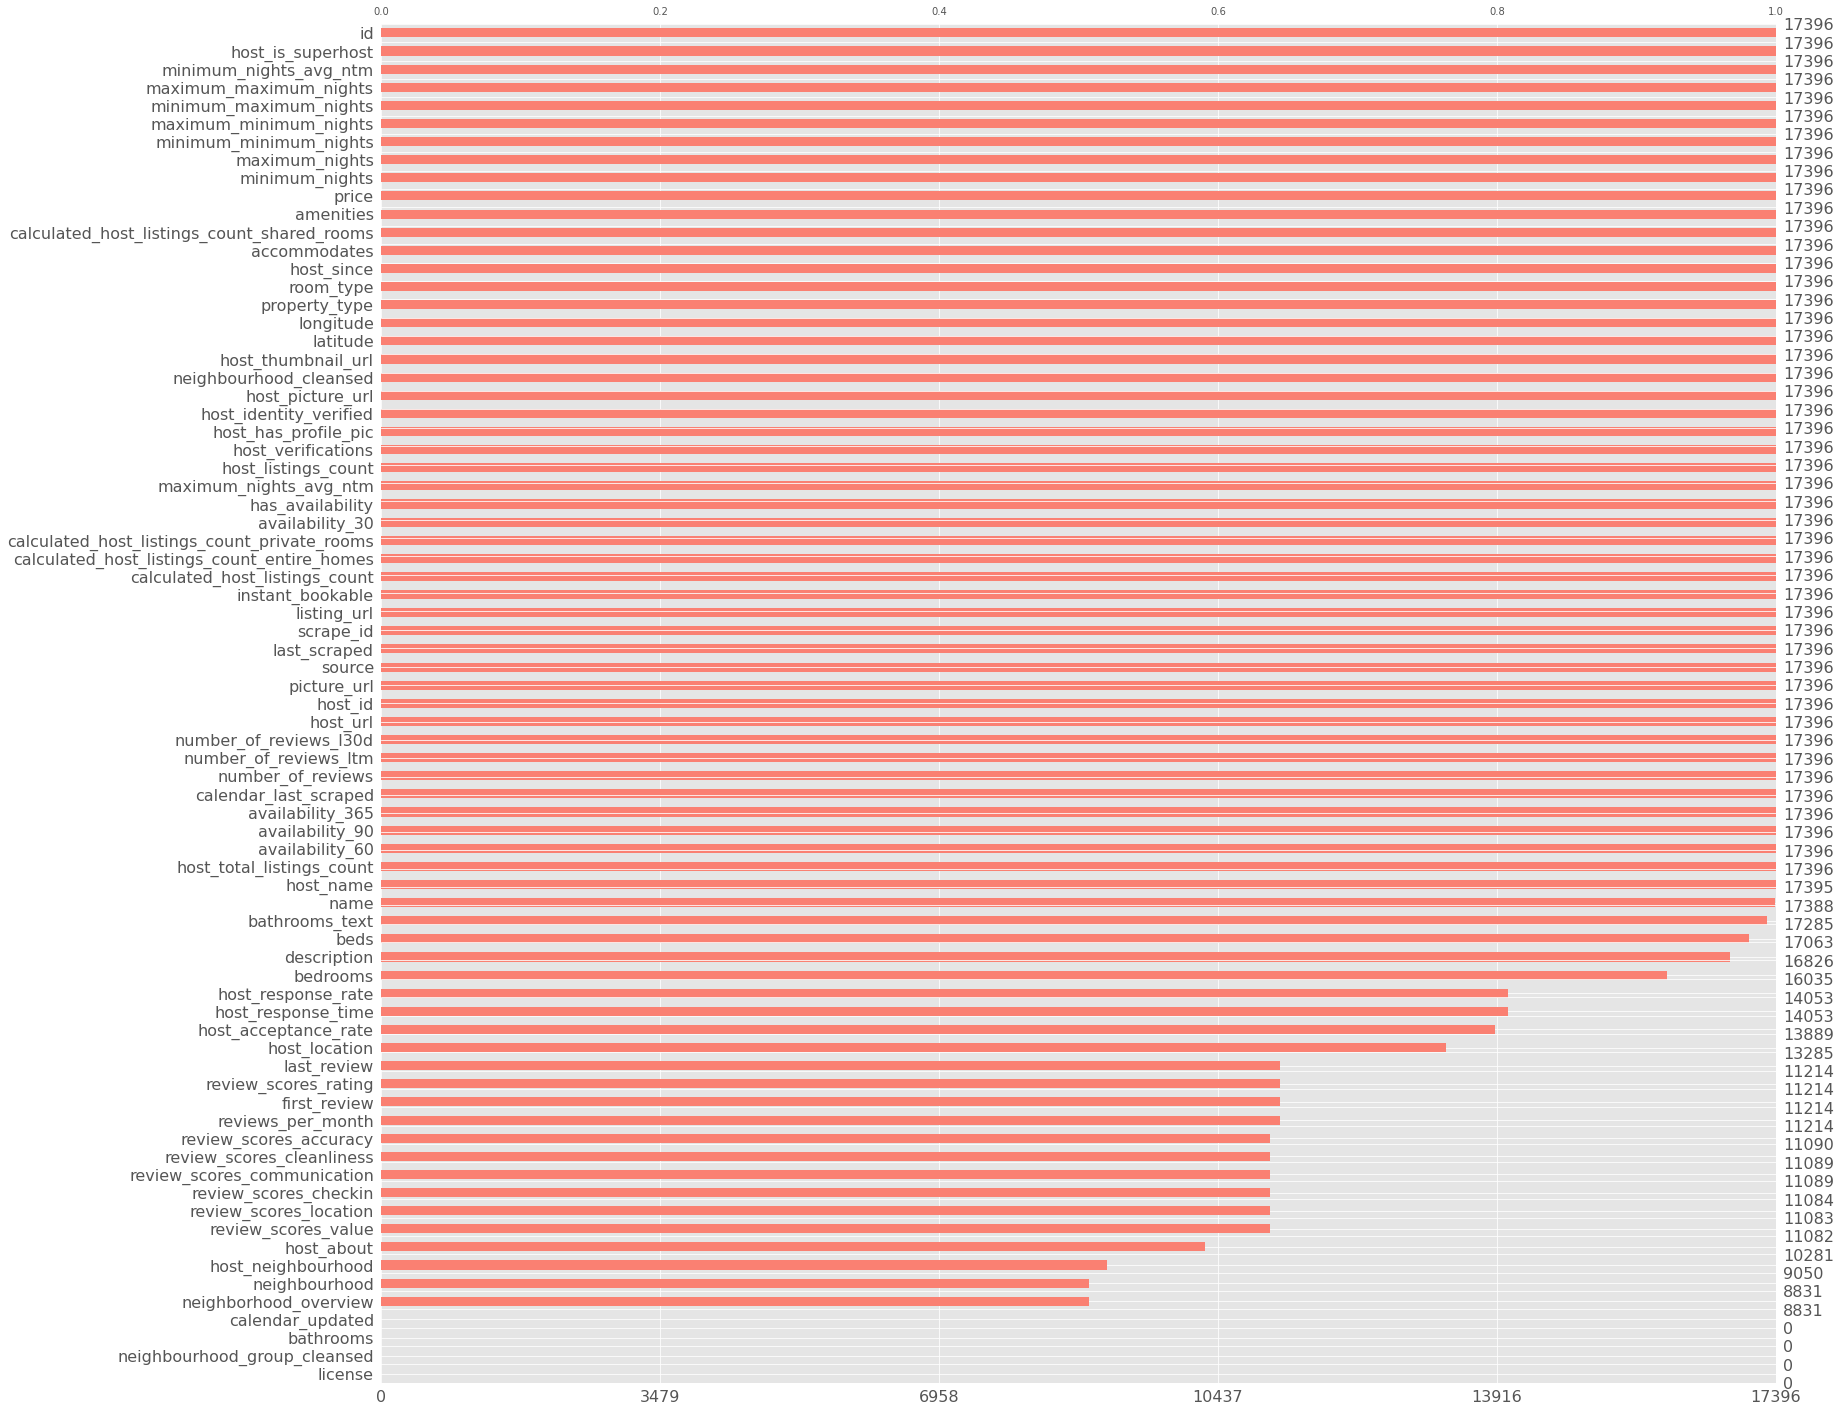

In [323]:
msno.bar(df_listing2, color='salmon', sort='ascending')

<AxesSubplot: >

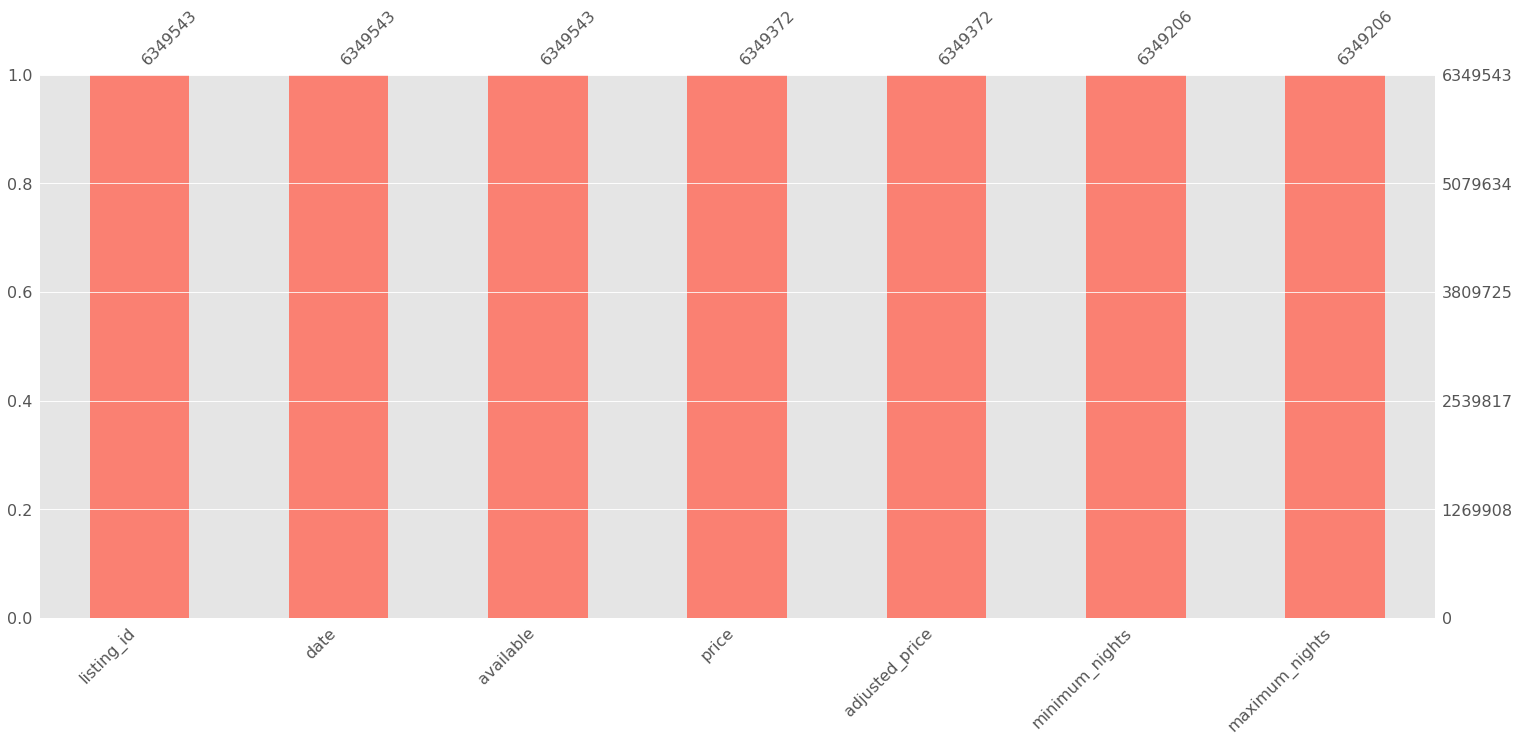

In [324]:
msno.bar(df_calendar, color='salmon')

## Where the most listing neighbourhood?

In [235]:
df_listing2.groupby('host_location')['id'].nunique().sort_values(ascending=False).head(10)

host_location
Bangkok, Thailand                   10558
Thailand                              823
Krung Thep Maha Nakhon, Thailand      241
Singapore                             199
Osaka, Japan                          112
London, United Kingdom                 76
Philippines                            74
Tokyo, Japan                           59
New York, NY                           56
Chiang Mai, Thailand                   45
Name: id, dtype: int64

In [239]:
df_listing2.groupby('neighbourhood').id.nunique().sort_values(ascending=False).head(10)

neighbourhood
Bangkok, Krung Thep Maha Nakhon, Thailand             1099
Khet Watthana, Krung Thep Maha Nakhon, Thailand        876
Bangkok, Thailand                                      813
Khet Khlong Toei, Krung Thep Maha Nakhon, Thailand     767
Khet Ratchathewi, Krung Thep Maha Nakhon, Thailand     461
Khet Huai Khwang, Krung Thep Maha Nakhon, Thailand     310
Khet Bang Rak, Krung Thep Maha Nakhon, Thailand        278
Khet Phra Nakhon, Krung Thep Maha Nakhon, Thailand     239
Khet Sathon, Krung Thep Maha Nakhon, Thailand          228
Khet Pathum Wan, Krung Thep Maha Nakhon, Thailand      192
Name: id, dtype: int64

- host_location look unclean

In [267]:
neighbourhood_rank = df_listing2.groupby('neighbourhood_cleansed').id.nunique().sort_values(ascending=False).head(10).reset_index()
fig = px.bar(neighbourhood_rank, x='neighbourhood_cleansed', y='id', text_auto=True)
fig.show()

## Season trend of booking?

In [108]:
season_trend = df_final.query('available == True').groupby('date').listing_id.nunique().reset_index()
px.line(season_trend, x='date', y='listing_id')

- As we see on trend after consolidate data, i will try (as much as we can)to select data that matured between 2022-jun-26 to 2023-jun-26
- For Host on Airbnb can set future period booking that why after jul 2023 look like down trend because that day maybe or maybe not booking in future.

In [117]:
df_jun_26 = df_final[(df_final['date']>='2022-06-26') & (df_final['date']<='2023-06-26')]

In [118]:
mature_trend = df_jun_26.query('available==True').groupby('date').listing_id.nunique().reset_index()
px.line(mature_trend, x='date', y='listing_id')

In [120]:
df_jun_26.head()

,Unnamed: 0,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,max_date
0,0,27934,2023-03-29,False,1885.0,1885.0,3.0,90.0,2024-03-27
1,1,27934,2023-03-30,False,1885.0,1885.0,3.0,90.0,2024-03-27
2,2,27934,2023-03-31,False,1885.0,1885.0,3.0,90.0,2024-03-27
3,3,27934,2023-04-01,True,1885.0,1885.0,3.0,90.0,2024-03-27
4,4,27934,2023-04-02,True,1885.0,1885.0,3.0,90.0,2024-03-27


- Now let's consolidate listing demographic

In [332]:
thailand_holiday = data_path + 'thailand_holiday.xlsx'
df_th_holiday_2022 = pd.read_excel(thailand_holiday, '2022')
df_th_holiday_2022['year'] = '2022'
df_th_holiday_2023 = pd.read_excel(thailand_holiday, '2023')
df_th_holiday_2023['year'] = '2023'

In [333]:
def holiday_clean_date(df):
    day_list = ['st', 'nd', 'rd', 'th']
    mnt_dict = {'jan': '01',
            'feb': '02',
            'mar': '03',
            'apr': '04',
            'may': '05',
            'jun': '06',
            'jul': '07',
            'aug': '08',
            'sep': '09', 
            'oct': '10',
            'nov': '11',
            'dec': '12'}
    date = df.date
    for i in day_list:
        date = date.str.replace(f'{i}', '')
    month = df.month
    month = month.str[:3].str.lower()
    month = month.apply(lambda x : mnt_dict[x])
    year = df.year
    final_date = year + '-' + month + '-' + date
    final_date = final_date.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
    return final_date
    

In [336]:
df_th_holiday_2022['final_date'] = holiday_clean_date(df_th_holiday_2022)
df_th_holiday_2023['final_date'] = holiday_clean_date(df_th_holiday_2023)
df_th_holiday = pd.concat([df_th_holiday_2022, df_th_holiday_2023], axis=0)
df_th_holiday['holiday'] = True

,date_name,date,month,description,year,final_date,holiday
0,Monday,3rd,January,Substitution for New Year'...,2022,2022-01-03,True
1,Wednesday,16th,February,Makha Bucha Day,2022,2022-02-16,True
2,Wednesday,6th,April,Chakri Memorial Day,2022,2022-04-06,True
3,Wednesday,13th,April,Songkran Festival,2022,2022-04-13,True
4,Thursday,14th,April,Songkran Festival,2022,2022-04-14,True


In [151]:
df_th_holiday_2022.date.unique()

array(['\u200b3rd', '\u200b16th', '\u200b6th', '\u200b13th', '\u200b14th',
       '\u200b15th', '\u200b2nd', '\u200b4th', '1\u200b6th', '13th',
       '\u200b28th', '29th', '\u200b12th', '\u200b24th', '\u200b5th'],
      dtype=object)

In [341]:
# add week and year
df_cal_28dec22['week'] = df_cal_28dec22.date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d').isocalendar().week)
df_cal_28dec22['year'] = df_cal_28dec22.date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d').isocalendar().year)


In [361]:
# Check lead time for each location
# What is maturity of hotel booking?
# df_cal_28dec22.query('year==2023').date.agg(['min', 'max'])
df_cal_28dec22.query('date=="2023-01-02"').head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,week,year
5,27934,2023-01-02,f,"$1,905.00","$1,905.00",3,90,1,2023
370,1704776,2023-01-02,t,"$1,000.00","$1,000.00",250,365,1,2023
735,1738669,2023-01-02,t,"$1,461.00","$1,461.00",1,1125,1,2023
1100,1744248,2023-01-02,t,"$1,558.00","$1,558.00",3,1125,1,2023
1465,1765918,2023-01-02,f,"$1,850.00","$1,850.00",15,1125,1,2023


In [349]:
df_calendar['week'] = df_calendar.date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d').isocalendar().week)
df_calendar['year'] = df_calendar.date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d').isocalendar().year)

In [358]:
# df_calendar.query('year==2023').date.agg(['min', 'max'])


min    2023-03-28
max    2023-12-31
Name: date, dtype: object

In [334]:
from datetime import datetime 
date_start = datetime.strptime(season_trend2.date.min(), '%Y-%m-%d')
date_end = datetime.strptime(season_trend2.date.max(), '%Y-%m-%d')
# season_trend2.date.nunique()
# (date_end - date_start).days

datetime.datetime(2024, 1, 2, 0, 0)

In [298]:
season_trend2.date.nunique()
# df_cal_28dec22.query('date == "2022-12-28" & available == "t"').head()
# .groupby('date').listing_id.count()
# 5021 2022-12-28	

371

In [203]:
df_final[df_final.duplicated(subset=['listing_id', 'date'])].head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
91,27934,2023-03-29,t,"$1,905.00","$1,905.00",3.0,90.0
92,27934,2023-03-30,t,"$1,905.00","$1,905.00",3.0,90.0
93,27934,2023-03-31,t,"$1,905.00","$1,905.00",3.0,90.0
94,27934,2023-04-01,t,"$1,905.00","$1,905.00",3.0,90.0
95,27934,2023-04-02,t,"$1,905.00","$1,905.00",3.0,90.0


In [9]:
df_cal_28dec22.groupby('available').available.count() / df_cal_28dec22.shape[0]

available
f    0.32986
t    0.67014
Name: available, dtype: float64

In [21]:
# df_listing2.groupby('id').price.nunique().sort_values(ascending=False).head()
# df_cal_28dec22.groupby('listing_id').price.nunique().sort_values(ascending=False).head()


,minimum_nights,maximum_nights
listing_id,,
5920464,1,31
15903961,1,31
22075328,1,31
691676086728681302,1,31
2461997,1,31
...,...,...
26611808,1,1
26612016,2,1
26612092,1,1


In [209]:
# df_reviews2.head()
# df_calendar.query('listing_id == 39020187').price.unique()
df_final[(df_final['listing_id']==27934) & (df_final['date']=='2023-03-29')]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,27934,2023-03-29,f,"$1,885.00","$1,885.00",3.0,90.0
91,27934,2023-03-29,t,"$1,905.00","$1,905.00",3.0,90.0


In [208]:
df_final[(df_final['listing_id']==27934) & (df_final['date']=='2023-03-29')].groupby(['listing_id', 'date']).rank(method='first')

,available,price,adjusted_price,minimum_nights,maximum_nights
0,1.0,1.0,1.0,1.0,1.0
91,2.0,2.0,2.0,2.0,2.0


In [75]:
df_listing.price.agg(['max', 'min'])

max    1000000
min        120
Name: price, dtype: int64

In [178]:
# Assumption 
# 1. chance room will booked in level date can compare with last year(let's say today for last year it booked or not?)
# 2. feature that relavant with season or holiday?
# 3. long weekend can we compute?
# 4. maybe depending on specific day that make guests decision to booked or not?
# 5. can we find demand on each day?
# 6. cumulative sum holiday?
# 7. zone impact with booking --> good zone will have hight chance to booked first
# 8. event impact with booking
# 9. Market dynamic
# 10. good review higher price
# 11. five star more impact on demand